In [349]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import spacy

### Import

In [350]:
df=pd.read_csv("../Data/Verb_Subject_Object.csv")
df.head()

,Wikipedia movie ID,Sentence,Verb,Subject,Object
0,23890098,1,work,NaN,NaN
1,23890098,1,develop,"['Shlykov', ',', 'a', 'hard', '-', 'working', ...","['a', 'bizarre', 'love', '-', 'hate', 'relatio..."
2,23890098,1,realize,NaN,"['they', 'are', ""n't"", 'so', 'different', 'aft..."
3,31186339,1,consist,"['The', 'nation', 'of', 'Panem']",NaN
4,31186339,2,provide,"['each', 'district']","['a', 'boy', 'and', 'girl', 'between', 'the', ..."


In [351]:
len(df)

2017975

In [352]:
df['Verb'] = df['Verb'].values
verbs=df["Verb"]

print(verbs)

0               work
1            develop
2            realize
3            consist
4            provide
             ...    
2017970    surrender
2017971       become
2017972         look
2017973       change
2017974       invade
Name: Verb, Length: 2017975, dtype: object


In [353]:
unique_verbs = set(verbs)

len(unique_verbs)

8525

In [354]:
bow_df=pd.read_csv("../Data/charA_action_charB.csv")
bow_df.head()

,Wikipedia movie ID,char A,action,char B
0,23890098,['Shlykov'],"[',', 'a', 'hard', '-', 'working', 'taxi', 'dr...",[]
1,31186339,['Katniss'],"['Her', 'older', 'sister', 'volunteer']",[]
2,31186339,['Katniss'],['starve'],[]
3,31186339,[],"['take', 'and']","['Peeta', 'Katniss']"
4,31186339,['Haymitch'],"['by', 'their', 'frequently', 'drunk', 'mentor...",[]


# Preprocessing

In [355]:
bow_df['action']=bow_df['action'].apply(lambda x : ast.literal_eval(x) if  pd.notnull(x) else np.nan)

In [356]:
# this is the column for converting the action to a string
bow_df['action_string'] = bow_df['action'].apply(lambda x: ' '.join(x))

In [357]:
bow_df.head()

,Wikipedia movie ID,char A,action,char B,action_string
0,23890098,['Shlykov'],"[,, a, hard, -, working, taxi, driver, and, Ly...",[],", a hard - working taxi driver and Lyosha , a ..."
1,31186339,['Katniss'],"[Her, older, sister, volunteer]",[],Her older sister volunteer
2,31186339,['Katniss'],[starve],[],starve
3,31186339,[],"[take, and]","['Peeta', 'Katniss']",take and
4,31186339,['Haymitch'],"[by, their, frequently, drunk, mentor, ,, past...",[],"by their frequently drunk mentor , past victor..."


### Cleaning of action

In [358]:
# copying action column
bow_df['action_words']=bow_df['action']

In [359]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a list of stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davide/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [360]:
stop_words=list(stop_words)

In [361]:
# CHECK IF ALL THE CONTENT OF ACTION ARE ONLY STRINGS

# Initialize a Counter to count the types
type_counter = Counter()

# Initialize a list to store the indexes of rows with lists in the 'action' column
rows_with_lists = []

# Iterate through each element in the 'action' column
for idx, action_list in enumerate(bow_df['action_words']):
    for element in action_list:
        element_type = type(element).__name__
        type_counter[element_type] += 1
    
        # Check if the action_list is a list
        if isinstance(element, list):
            rows_with_lists.append(idx)

# Print the counts
print(type_counter)

# Print the indexes of rows with lists in the 'action' column
print("Indexes of rows with lists:", rows_with_lists)

Counter({'str': 4248664})
Indexes of rows with lists: []


In [362]:
bow_df['action_words'] = [[element.lower() if isinstance(element, str) else element for element in sub_list] for sub_list in bow_df['action']]



In [363]:
def remove_specific_strings(series_list):
    # Remove specific strings like "'s" from the list
    return [word for word in series_list if word != "'s"]

def remove_stopwords_from_list(words_list):
    # Remove stopwords from the list
    return [word for word in words_list if word not in stop_words]



# Apply the function to remove specific strings
bow_df['action_words'] = bow_df['action_words'].apply(remove_specific_strings)

bow_df['action_words'] = bow_df['action_words'].apply(remove_stopwords_from_list)


In [364]:

# remove any element that contains non-letters
import re

bow_df['action_words'] = [[element for element in sub_list if re.search('[a-zA-Z]', element)] for sub_list in bow_df['action']]


In [365]:
bow_df.head(50)

,Wikipedia movie ID,char A,action,char B,action_string,action_words
0,23890098,['Shlykov'],"[,, a, hard, -, working, taxi, driver, and, Ly...",[],", a hard - working taxi driver and Lyosha , a ...","[a, hard, working, taxi, driver, and, Lyosha, ..."
1,31186339,['Katniss'],"[Her, older, sister, volunteer]",[],Her older sister volunteer,"[Her, older, sister, volunteer]"
2,31186339,['Katniss'],[starve],[],starve,[starve]
3,31186339,[],"[take, and]","['Peeta', 'Katniss']",take and,"[take, and]"
4,31186339,['Haymitch'],"[by, their, frequently, drunk, mentor, ,, past...",[],"by their frequently drunk mentor , past victor...","[by, their, frequently, drunk, mentor, past, v..."
5,31186339,['Peeta'],"[reveal, love, for]","['Peeta', 'Katniss']",reveal love for,"[reveal, love, for]"
6,31186339,['Katniss'],"[discover, meant, what, said]",['Peeta'],discover meant what said,"[discover, meant, what, said]"
7,31186339,['Peeta'],"[mean, what, said]",['Peeta'],mean what said,"[mean, what, said]"
8,31186339,['Peeta'],"[say, what]",[],say what,"[say, what]"
9,31186339,['Katniss'],"[survive, The, televised, Games, begin, with, ...",[],survive The televised Games begin with half of...,"[survive, The, televised, Games, begin, with, ..."


In [366]:
bow_df['action_words'] = bow_df['action'].apply(lambda x: ' '.join(x))


In [367]:
bow_df.head()

,Wikipedia movie ID,char A,action,char B,action_string,action_words
0,23890098,['Shlykov'],"[,, a, hard, -, working, taxi, driver, and, Ly...",[],", a hard - working taxi driver and Lyosha , a ...",", a hard - working taxi driver and Lyosha , a ..."
1,31186339,['Katniss'],"[Her, older, sister, volunteer]",[],Her older sister volunteer,Her older sister volunteer
2,31186339,['Katniss'],[starve],[],starve,starve
3,31186339,[],"[take, and]","['Peeta', 'Katniss']",take and,take and
4,31186339,['Haymitch'],"[by, their, frequently, drunk, mentor, ,, past...",[],"by their frequently drunk mentor , past victor...","by their frequently drunk mentor , past victor..."


### Creation of list of verbs for clustering

In [368]:
actions_words=bow_df['action_words'].values
len(actions_words)

803826

In [369]:
actions_words=set(actions_words)
actions_words=list(unique_actions)
len(actions_words)

409982

In [370]:
actions_words_test=actions_words[:1000]

In [371]:
action_string=bow_df['action_string'].values
len(action_string)

803826

In [372]:
action_string=set(action_string)
action_string=list(action_string)
len(action_string)

455580

In [373]:
action_string_test=actions_words[:1000]

# Word embeddings

### Word2vec

In [323]:
# Load spaCy model (you may need to install it first: pip install spacy)
nlp = spacy.load("en_core_web_md")

# Get embeddings for each verb
verb_embeddings = [nlp(elem).vector for elem in action_string_test]

In [324]:
# Calculate cosine similarity matrix
similarity_matrix = np.dot(verb_embeddings, np.transpose(verb_embeddings))

### Clustering with Word2Vec

In [325]:
# Apply K-means clustering
k = 20 # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(verb_embeddings)

# Print the clusters
for cluster_id in range(k):
    cluster_verbs = [verb for i, verb in enumerate(action_string_test) if clusters[i] == cluster_id]
    print(f"\nCluster {cluster_id + 1}: {cluster_verbs}")

/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 1: ['kill the boy assigned to guard it', 'cause it to stab in the stomach instead', 'have a confrontation with father', 'suffer a heart stroke', 'the need a charity to represent and a city license', 'the and the friends pay a visit', 'the find that and crew are again moving the women , this time to a more secure location', 'the reimburse him', 'The assure The that will not be necessary and The attention will lie on the home , which is going to become a reality', 'see a dingo', 'who have previous links to', 'see a car leaving the house', 'receive a call that has escaped', 'we see a grown - up', 'want to live closer to apartment in Jersey City', 'find a good school', 'find a Hello Kitty backpack', "have dreams of a little girl who appears to be returning from a visit to her father 's home", 'take a bath', 'want to read to her', 'Miss Lombardo suggest that accompany to a local club', 'confront and promises to get the money back for her', 'make a moving speech motivating the commu

### Using a transformers

In [326]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

In [327]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


In [328]:
# Load model from HuggingFace Hub

# use "sentence-transformers/all-MiniLM-L6-v2" model for faster embeddings
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')

In [329]:
# Tokenize sentences
encoded_input = tokenizer(list(action_string_test), padding=True, truncation=True, return_tensors='pt')

In [330]:
# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

### Clustering with transformers

In [334]:

# Apply K-means clustering
k = 50  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings)

# Print the clusters
for cluster_id in range(k):
    cluster_verbs = [verb for i, verb in enumerate(action_string_test) if clusters[i] == cluster_id]
    print(f"\nCluster {cluster_id + 1}: {cluster_verbs}")

/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 1: ['the scheme go', 'go', 'go', 'go', 'go', 'go', 'go', 'go']

Cluster 2: ['promise just retribution to the crime of killing', 'the provide him', 'the reimburse him', 'The attention lie', "'s conceal the truth", 'sneak', "restore 's faith in him", 'sneak', 'remember sacrifice', 'lust whom', 'preserve ‘ secret ’', 'Dada swear revenge against', 'confess lied about working with the police', 'sacrifice reputation', 'sacrifice', 'remember poor ’s last words', 'know deeds', 'have betrayed by', 'betray', 'have reveal the secret of strength and then deliver for punishment', 'reveal the secret of strength', 'give strength', 'blinding and torture make feel deep remorse over betrayal', 'feel deep remorse', 'remember something', 'weep', 'promise , a virtual stranger to him', 'regard who', "distrust 's uncle"]

Cluster 3: ['by their frequently drunk mentor , past victor Abernathy accompany', 'Ben Canaan , a Hagannah rebel who previously was a captain in the Jewish Brigade of the British A

In [335]:
# DO NOT use if you are clustering on the sentences

from collections import Counter

# Assuming "verbs" is a list of all verbs
word_freq = Counter(verbs)  # Calculate frequency of each word

# Print the top 10 verbs for each cluster with their frequencies, sorted by frequency
for cluster_id in range(k):
    cluster_verbs = bow_df_test[bow_df_test['cluster'] == cluster_id]['Verb'].tolist()

    # Sort the verbs in the cluster by frequency (highest to lowest)
    cluster_verbs_sorted = sorted(cluster_verbs, key=lambda verb: word_freq[verb], reverse=True)

    # Keep only the top 10 verbs
    top_10_cluster_verbs = cluster_verbs_sorted[:10]

    # Prepare a string to display sorted verbs with their frequencies
    cluster_verbs_with_freq = ', \n'.join([f"{verb}: {word_freq[verb]}" for verb in top_10_cluster_verbs])

    print(f"\nCluster {cluster_id + 1} Top 10 Verbs: {cluster_verbs_with_freq}")


KeyError: 'Verb'

# Sentiment analysis

In [336]:
from transformers import pipeline
import torch

In [337]:
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
result=classifier("I love this!")


/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [339]:
from tqdm import tqdm  # Import tqdm

# Create an empty DataFrame to store the results
columns = ['Action', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
df_results = pd.DataFrame(columns=columns)

# Create a tqdm progress bar for the loop
with tqdm(total=len(action_string_test)) as pbar:
    # Iterate through each verb and classify its emotion
    for item in action_string_test:
        # Classify emotion for the verb
        emotion_scores = classifier(item)[0]

        # Create a dictionary with the results
        result_dict = {'Action': item}
        result_dict.update({emotion['label']: emotion['score'] for emotion in emotion_scores})
        # Append the results to the DataFrame
        df_results.loc[len(df_results)] = result_dict

        # Update the progress bar
        pbar.update(1)

# Display the final DataFrame
df_results.head()


100%|█████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.81it/s]


,Action,anger,disgust,fear,joy,neutral,sadness,surprise
0,", a hard - working taxi driver and Lyosha , a ...",0.331131,0.075999,0.216934,0.040529,0.050560,0.030745,0.254102
1,take Katniss and,0.006633,0.001414,0.003896,0.021030,0.925691,0.020234,0.021103
2,"by their frequently drunk mentor , past victor...",0.042054,0.088938,0.058847,0.029808,0.056832,0.669794,0.053727
3,reveal love for Katniss,0.005539,0.003929,0.002717,0.819981,0.027523,0.087279,0.053032
4,Katniss discover meant what said,0.009344,0.004472,0.003629,0.004326,0.320616,0.013068,0.644544


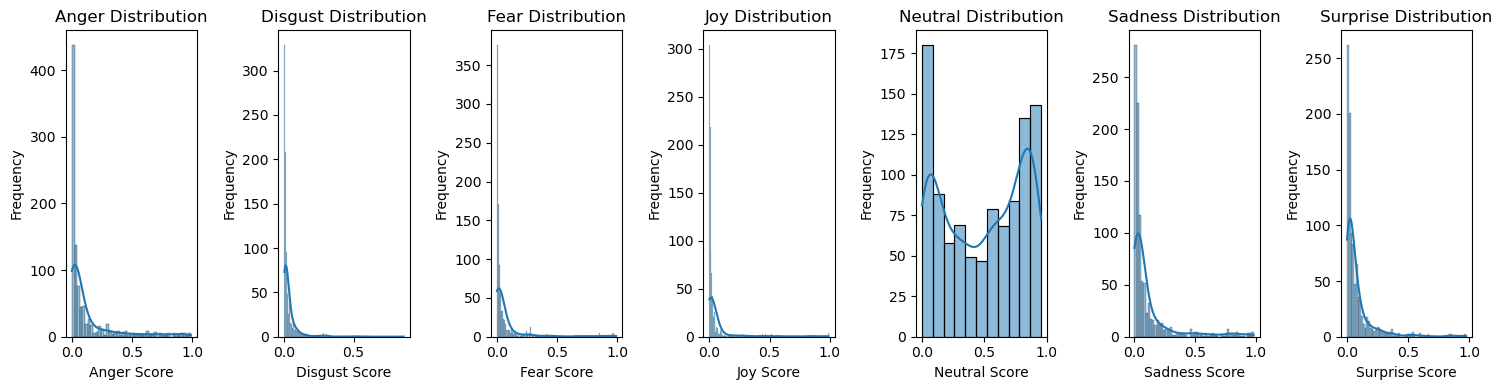

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_results is your DataFrame
columns_to_plot = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 4))

# Plot KDE for each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(df_results[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} Distribution')
    axes[i].set_xlabel(f'{column.capitalize()} Score')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Clustering with sentiment analysis

/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

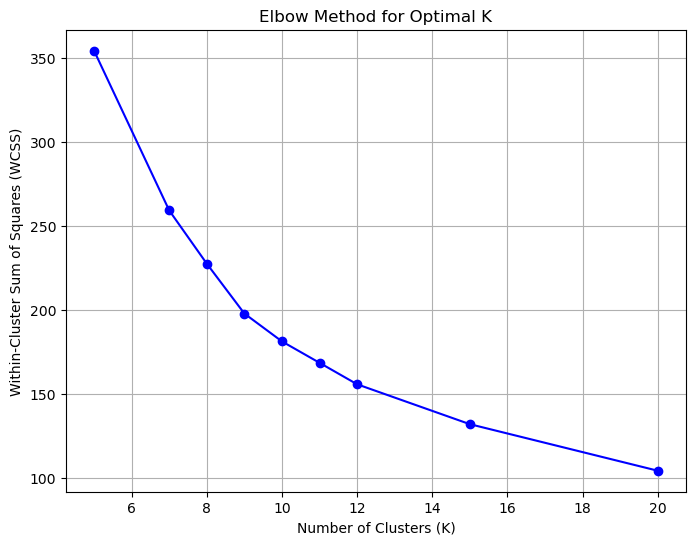

In [42]:
# Define a range of values for K
k_values = [5, 7,8,9, 10,11, 12, 15, 20]

# Create an empty list to store the WCSS values
wcss_values = []

# Calculate WCSS for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss = kmeans.inertia_
    wcss_values.append(wcss)

# Plot the WCSS values
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


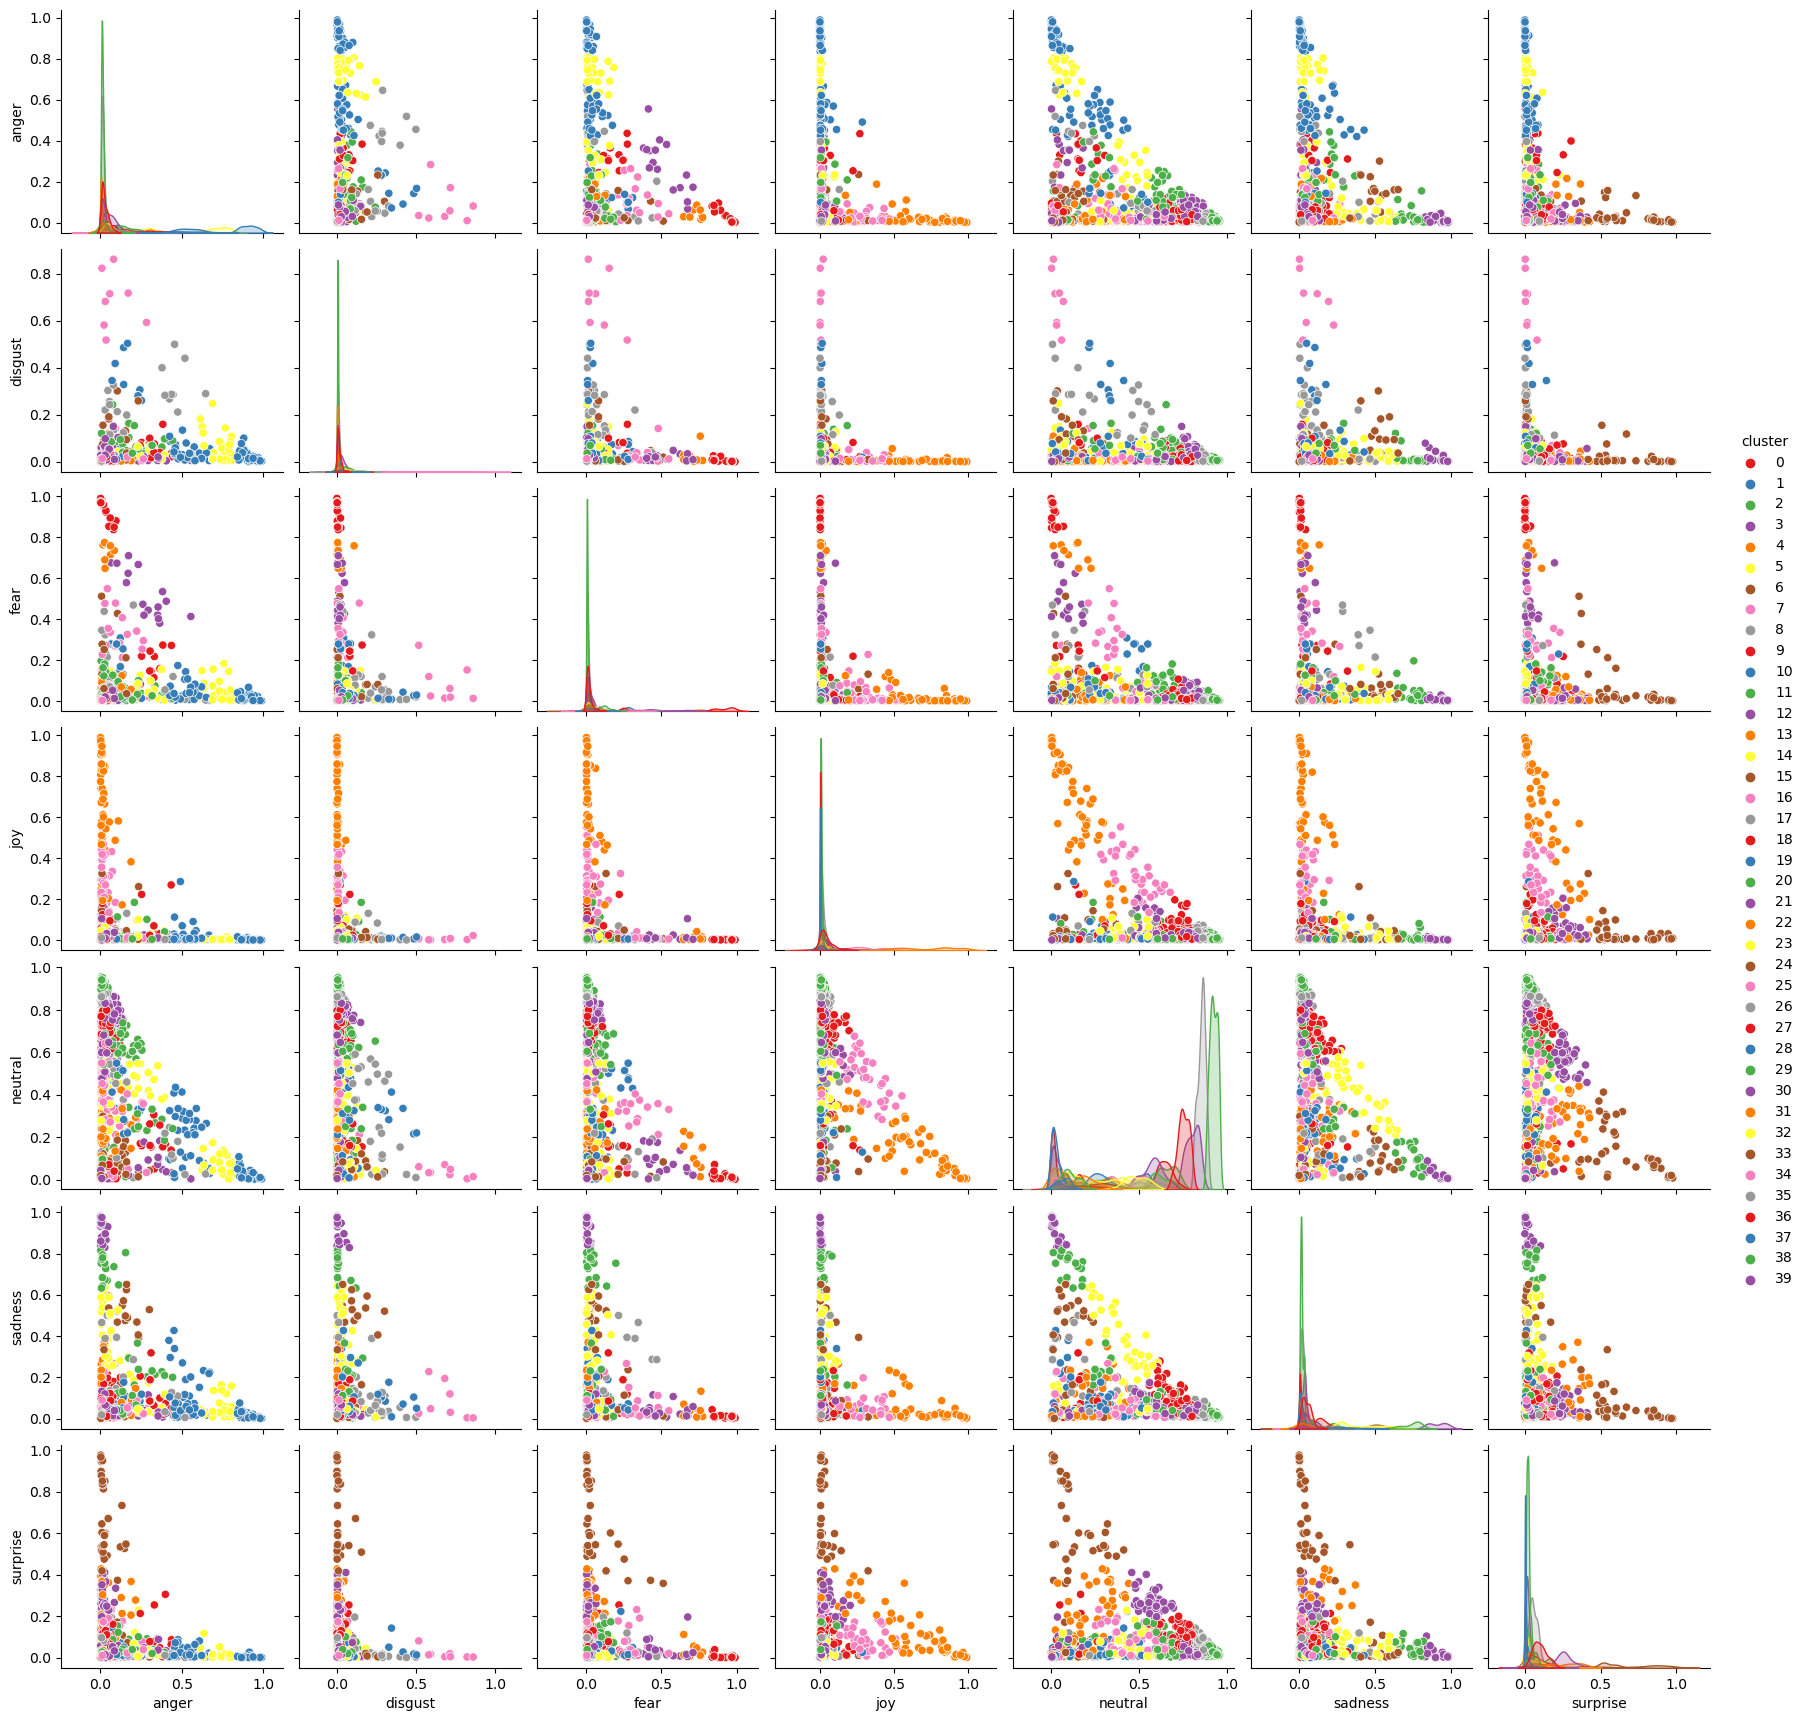

In [342]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select columns for clustering
columns_for_clustering = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
data_for_clustering = df_results[columns_for_clustering]

# Choose the number of clusters (K)
k = 40

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df_results['cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters
sns.pairplot(df_results, hue='cluster', vars=columns_for_clustering, diag_kind='kde', palette='Set1')
plt.show()


In [345]:
df_results.head()

,Action,anger,disgust,fear,joy,neutral,sadness,surprise,cluster
0,", a hard - working taxi driver and Lyosha , a ...",0.331131,0.075999,0.216934,0.040529,0.050560,0.030745,0.254102,9
1,take Katniss and,0.006633,0.001414,0.003896,0.021030,0.925691,0.020234,0.021103,20
2,"by their frequently drunk mentor , past victor...",0.042054,0.088938,0.058847,0.029808,0.056832,0.669794,0.053727,2
3,reveal love for Katniss,0.005539,0.003929,0.002717,0.819981,0.027523,0.087279,0.053032,13
4,Katniss discover meant what said,0.009344,0.004472,0.003629,0.004326,0.320616,0.013068,0.644544,6


In [348]:
# Create a list of clusters, each containing the corresponding actions
clusters = [df_results[df_results['cluster'] == cluster_id]['Action'].tolist() for cluster_id in range(k)]

# Print the clusters
for cluster_id, cluster_verbs in enumerate(clusters):
    print(f"\nCluster {cluster_id + 1}: {cluster_verbs}")


Cluster 1: ['present Katniss and', 'get medicine', 'force Katniss and', "The 's choice finish", 'the plan', 'the manage', 'the turn the tables', 'who sentence the', "Law - enforcement officials find new witnesses , forensics experts , and a lot of circumstantial evidence — including a small wooden coffin uses as a receptacle for parishioners ' packs of un - smoked cigarettes —", 'escape', "discover that Stevens handed the assassin a gun during the president 's entrance", "say that still does n't know who wanted the President dead", 'a young girl , , stand', "find 's body", 'agree so shared custody will go easier', 'plead', "restore 's faith in him", 'fulfil co - Sing leader duties and', "pen an article series in 's name", "write speeches , paid by the newspaper 's publisher , D.B. Norton ( [ [ Edward Arnold", ', who has come to believe in the John philosophy himself , realize that John is being used', 'by throw', 'collide', 'discover and', 'find the body of', "whose talent scout spot 

In [81]:
# DO NOT RUN if you are doing sentiment analysis on sentences

from collections import Counter

# Assuming "verbs" is a list of all verbs
word_freq = Counter(verbs)  # Calculate frequency of each word

# Print the top 10 verbs for each cluster with their frequencies, sorted by frequency
for cluster_id in range(k):
    cluster_verbs = df_results[df_results['cluster'] == cluster_id]['Verb'].tolist()

    # Sort the verbs in the cluster by frequency (highest to lowest)
    cluster_verbs_sorted = sorted(cluster_verbs, key=lambda verb: word_freq[verb], reverse=True)

    # Keep only the top 10 verbs
    top_10_cluster_verbs = cluster_verbs_sorted[:10]

    # Prepare a string to display sorted verbs with their frequencies
    cluster_verbs_with_freq = ', \n'.join([f"{verb}: {word_freq[verb]}" for verb in top_10_cluster_verbs])

    print(f"\nCluster {cluster_id + 1} Top 10 Verbs: {cluster_verbs_with_freq}")



Cluster 1 Top 10 Verbs: bring: 8357, 
plan: 4300, 
miss: 3049, 
intend: 1880, 
finish: 1830, 
lock: 1806, 
injure: 1758, 
deal: 1676, 
drag: 1091, 
possess: 941

Cluster 2 Top 10 Verbs: decide: 14979, 
force: 6971, 
fight: 5579, 
prove: 2729, 
arrange: 2015, 
push: 1631, 
mean: 1622, 
proceed: 1468, 
propose: 1434, 
point: 1249

Cluster 3 Top 10 Verbs: use: 14176, 
marry: 9520, 
lose: 7895, 
love: 5192, 
sleep: 2470, 
sneak: 1822, 
bury: 1351, 
embrace: 705, 
decline: 635, 
cure: 522

Cluster 4 Top 10 Verbs: go: 37549, 
make: 25617, 
come: 20400, 
return: 15770, 
ask: 12797, 
say: 12360, 
live: 11568, 
work: 10653, 
name: 8965, 
send: 8887

Cluster 5 Top 10 Verbs: rape: 1492, 
suck: 321, 
disgust: 210, 
waste: 176, 
allege: 166, 
embarrass: 148, 
infest: 98, 
disregard: 86, 
whistle: 80, 
shrug: 76

Cluster 6 Top 10 Verbs: defeat: 2219, 
suspect: 1928, 
apologize: 1138, 
hurt: 977, 
conduct: 567, 
condemn: 333, 
fool: 332, 
frighten: 306, 
feign: 200, 
incriminate: 199

Cluster 7 Top 